In [1]:
import pyhf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
real_y = np.array([1.0 ,37.0 ,546.0 ,110.0 ,18.0 ,7.0 ,4.0 ])
data_y = np.array([29.0 , 543.0 , 8923.0    , 2323.0    ,1172.0 , 941.0 , 516.0])
fake_y = np.array([4.0,117.0  ,1908.0 ,2037.0 ,1172.0 ,944.0  ,518.0])

In [3]:
spec = {
    "channels": [
        {
            "name": "region_one",
            "samples": [
                {
                    "data": list(real_y) ,
                    "modifiers": [
                        {"name": "scale_real", "type": "normfactor", "data": None},
                        {"name": "dummy", "type": "normfactor", "data": None},
                    ],
                    "name": "real",
                },
                {
                    "data": list(fake_y),
                    "modifiers": [
                        {"name": "scale_fake", "type": "normfactor", "data": None}
                    ],
                    "name": "fake",
                },
            ],
        }
    ],
    "measurements": [
        {
            "config": {
                "parameters": [{"name": "dummy", "fixed": True}],
                "poi": "dummy",
            },
            "name": "normfactor example",
        }
    ],
    "observations": [
        {"data": list(data_y), "name": "region_one"},
    ],
    "version": "1.0.0",
}

In [4]:
def fit(spec):
    ws = pyhf.Workspace(spec)
    model = ws.model()
    data = ws.data(model)
    fit_results = pyhf.infer.mle.fit(data,model)
    
    return model,fit_results

In [5]:
def get_parameter_names(model):
    labels = []
    for parname in model.config.par_order:
        for i_par in range(model.config.param_set(parname).n_parameters):
            labels.append(
                f"{parname}[bin_{i_par}]"
                if model.config.param_set(parname).n_parameters > 1
                else parname
            )
    return labels

In [6]:
def get_SF(model,get_parameter_names):
    SF_real = 0
    SF_fake = 0
    
    for i,label in enumerate(get_parameter_names(model)):
        print(f"{label}: {fit_results[i]}")

        if label.startswith("scale_real"):
            SF_real = fit_results[i]
        elif label.startswith("scale_fake"):
            SF_fake = fit_results[i]
            
    print("Real template SF: ",SF_real)
    print("Fake template SF: ",SF_fake)
    return SF_real, SF_fake

In [7]:
def draw(real_y,fake_y,data_y,isfit=False):
    
    fig,ax =  plt.subplots()
    bins = np.arange(len(data_y))
    width= 1.
    data_fitted = real_y + fake_y 

    
    bins = np.arange(len(data_y))

    ax.bar(bins,real_y,width,label="Real template",edgecolor='darkorange',fill=False)
    ax.bar(bins,fake_y,width,label="Fake template",edgecolor='royalblue',fill=False)
    
    if isfit:
        ax.bar(bins,data_fitted,width,label="Fit result",edgecolor='crimson',fill=False,linestyle='--')
    ax.scatter(bins,data_y,color='black',label='Data template')
    
    if isfit:
        ax.set_title('After fit')
    else:
        ax.set_title('Before fit')
    ax.legend()

---

In [8]:
model,fit_results  =fit(spec)

In [9]:
SF_real, SF_fake = get_SF(model,get_parameter_names)

scale_real: 9.999999999997103
dummy: 1.0
scale_fake: 0.907793264398799
Real template SF:  9.999999999997103
Fake template SF:  0.907793264398799


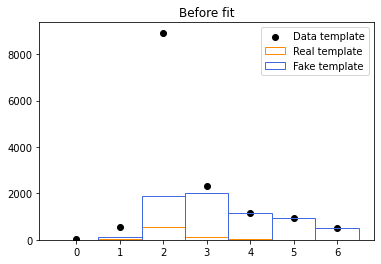

In [10]:
draw(real_y,fake_y,data_y)

In [11]:
real_y = real_y * SF_real
fake_y = fake_y * SF_fake

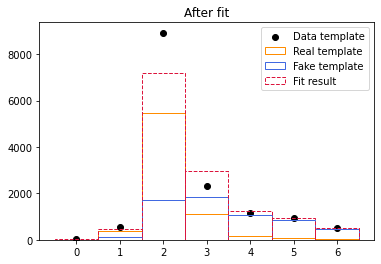

In [12]:
draw(real_y,fake_y,data_y,True)